In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Change Directory
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Python/Use-Case/Purchasing_Propensity_Model/')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Python/Use-Case/Purchasing_Propensity_Model'

In [33]:
# Show Data Profile
def show_data_profile(df):
  Data_dict = pd.DataFrame(df.dtypes)
  Data_dict = Data_dict.rename(columns={0: 'Data_Type'})
  Data_dict['Missing'] = df.isnull().sum()
  Data_dict['Missing_Pct'] = round((df.isnull().sum()/df.count())*100, 2)
  Data_dict['Unique'] = df.nunique()
  Data_dict['Count'] = df.count()
  Data_dict=Data_dict.reset_index()
  desc = df.describe(include='all').T
  desc = desc.drop(['count', 'unique'], axis=1)
  desc = desc.reset_index()
  Data_dict2 = pd.merge(Data_dict,desc,how='left', on=['index'])
  Data_dict2 = Data_dict2.fillna('-')#.sort_values(by=['Data_Type','Missing_Pct'],ascending=[True,False])
  Data_dict2 = Data_dict2.reset_index(drop=True).rename(columns={'index':'Features'})
  return Data_dict2

In [5]:
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",category=RuntimeWarning)


import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('mode.chained_assignment', None)

import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



#DATA PREPARATION

In [6]:
#Load Data
df = pd.read_csv("customer_propensity_to_purchase.csv", sep=",",encoding='latin1' )

In [7]:
df.head(1)

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,checked_delivery_detail,checked_returns_detail,sign_in,saw_checkout,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


**UserID** A unique identifier for the visitor  
**basket_icon_click** Did the visitor click on the shopping basket icon?  
**basket_add_list** Did the visitor add a product to their shopping cart on the 'list' page?  
**basket_add_detail** Did the visitor add a product to their shopping cart on the 'detail' page?  
**sort_by** Did the visitor sort products on a page?  
**image_picker** Did the visitor use the image picker?  
**account_page_click** Did the visitor visit their account page?  
**promo_banner_click** Did the visitor click on a promo banner?  
**detail_wishlist_add** Did the visitor add a product to their wishlist from the 'detail' page?  
**list_size_dropdown** Did the visitor interact with a product dropdown?  
**closed_minibasket_click** Did the visitor close their mini shopping basket?  
**checked_delivery_detail** Did the visitor view the delivery FAQ area on a product page?  
**checked_returns_detail** Did the visitor check the returns FAQ area on a product page?  
**sign_in** Did the visitor sign in to the website?  
**saw_checkout** Did the visitor view the checkout?  
**saw_sizecharts** Did the visitor view a product size chart?  
**saw_delivery** Did the visitor view the delivery FAQ page?  
**saw_account_upgrade** Did the visitor view the account upgrade page?  
**saw_homepage** Did the visitor view the website homepage?  
**device_mobile** Was the visitor on a mobile device?  
**device_computer** Was the visitor on a desktop device?  
**device_tablet** Was the visitor on a table device?  
**returning_user** Was the visitor new or returning?  
**loc_uk** Was the visitor located in the UK, based on their IP address?  
**orderedD** id the customer place an order?  

In [8]:
#Rename column replacing whitespace with underscore
df.rename(columns= lambda x : x.replace(' ','_') if ' ' in x else x, inplace=True)
#Remove row with all columns are NA
df = df.dropna(how='all')

In [9]:
show_data_profile(df)

,Features,Data_Type,Missing,Missing_Pct,Unique,Count,top,freq,mean,std,min,25%,50%,75%,max
0,UserID,object,0,0.0,455401,455401,26ab-1e77d640-26ab-417c-bcb1-547734,1,-,-,-,-,-,-,-
1,basket_icon_click,int64,0,0.0,2,455401,-,-,0.09915,0.298864,0,0,0,0,1
2,basket_add_list,int64,0,0.0,2,455401,-,-,0.0745211,0.262617,0,0,0,0,1
3,basket_add_detail,int64,0,0.0,2,455401,-,-,0.112916,0.31649,0,0,0,0,1
4,sort_by,int64,0,0.0,2,455401,-,-,0.0368488,0.188391,0,0,0,0,1
5,image_picker,int64,0,0.0,2,455401,-,-,0.0267347,0.161307,0,0,0,0,1
6,account_page_click,int64,0,0.0,2,455401,-,-,0.00357048,0.0596468,0,0,0,0,1
7,promo_banner_click,int64,0,0.0,2,455401,-,-,0.0162077,0.126274,0,0,0,0,1
8,detail_wishlist_add,int64,0,0.0,2,455401,-,-,0.00351119,0.0591513,0,0,0,0,1
9,list_size_dropdown,int64,0,0.0,2,455401,-,-,0.230362,0.421065,0,0,0,0,1


###EDA

####Correlation Matrix

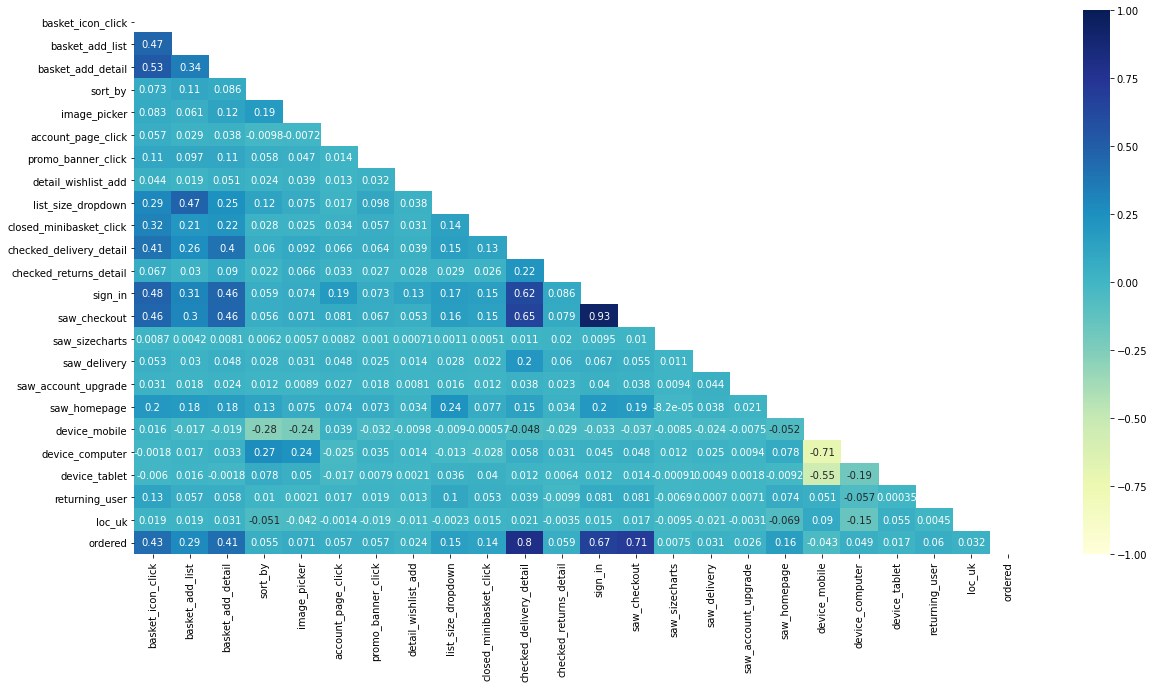

In [10]:
corr = df.corr()
mask = np.triu(corr)
#mask = np.tril(corr)
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1,vmax=1,annot=True, fmt='.2g',cmap='YlGnBu',mask=mask,annot_kws={"size": 10})
b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Target Class Proportion

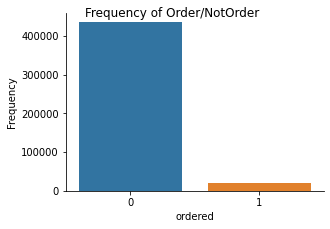

In [11]:
g = sns.catplot("ordered", data=df, kind='count',height=3, aspect=1.5)
g.set_ylabels("Frequency")
g.fig.suptitle("Frequency of Order/NotOrder")
g.fig.show()

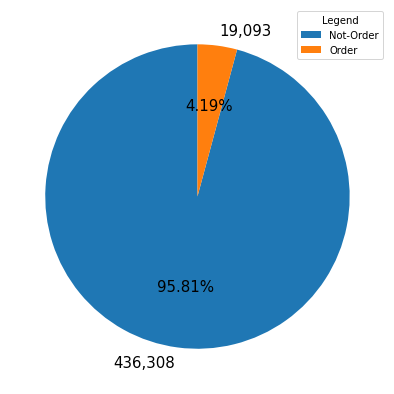

In [12]:
flag_taker_Pie=df['ordered'].value_counts().reset_index(name='count').rename(columns={'index':'Ordered'})
flag_taker_Pie.plot(kind='pie', y = 'count', autopct='%1.2f%%', startangle=90, shadow=False, labels=['{:,}'.format(x) for x in flag_taker_Pie['count']], legend = True, fontsize=15, figsize=(7,7))
#plt.title("Combo Package Taker : 1=Yes , 0= No")
plt.legend(title='Legend', loc='upper right', labels=['Not-Order', 'Order'])
plt.xlabel('')
plt.ylabel('')
plt.show()

# MODELLING

### Train Test Split

In [81]:
# Set features and target
X = df.drop(['UserID','ordered','checked_delivery_detail','saw_checkout','saw_delivery'],axis='columns')
y = df['ordered']

In [82]:
# Split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=9988)

## Re-sampling

In [75]:
# # Option : Using oversampling
# from imblearn.over_sampling import SMOTE
# smote = SMOTE('not majority') #not majority -> Semua class dibuat jumlahnya sama dengan class terbanyak
# X_sm, y_sm = smote.fit_sample(X_train,y_train)
# X_train = pd.DataFrame(X_sm,columns = X_train.columns)
# y_train = y_sm

## Algorithm Selection

In [50]:
def modeling(x,y):
    #############################################
    
    # STRATIFIED K FOLD
    from sklearn.model_selection import StratifiedKFold
    #Linear Model
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    
    #Ensemble
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
    
    #Cross Val Score
    from sklearn.model_selection import cross_val_score
    
    #XGBOOST
    from xgboost import XGBClassifier
    
    #################################################
    
    #linear Model
    logreg = LogisticRegression(random_state = 123)
    
    # Tree
    dt = DecisionTreeClassifier(random_state=123)
    #Ensemble
    randomforest = RandomForestClassifier()
    ada = AdaBoostClassifier()
    gdc = GradientBoostingClassifier()
    bagging = BaggingClassifier()
    xgb= XGBClassifier()
    
    classifiers = [logreg,dt,randomforest,bagging,ada,gdc, xgb]
    result=[]
    for clf, label in zip(classifiers, 
                      ['Logistic Regression',
                       'Decision Tree',
                       'Random Forest',
                       'Bagging',
                       'AdaBoost',
                       'GradBoost',
                      'XGBoost']):

        scores_auc = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='roc_auc')
        scores_precision = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='precision_macro')
        scores_recall = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='recall_macro')
        scores_f1 = cross_val_score(clf, x, y, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=123), scoring='f1_macro')
        print("AUC       : %0.4f (+/- %0.4f) [%s]" % (scores_auc.mean(), scores_auc.std(), label))
        print("Precision : %0.4f (+/- %0.4f) [%s]" % (scores_precision.mean(), scores_precision.std(), label))
        print("Recall    : %0.4f (+/- %0.4f) [%s]" % (scores_recall.mean(), scores_recall.std(), label))
        print("F1        : %0.4f (+/- %0.4f) [%s]" % (scores_f1.mean(), scores_f1.std(), label))

        auc="%0.4f (+/- %0.4f)" % (scores_auc.mean(), scores_auc.std())
        precision="%0.4f (+/- %0.4f)" % (scores_precision.mean(), scores_precision.std())
        recall="%0.4f (+/- %0.4f)" % (scores_recall.mean(), scores_recall.std())
        f1="%0.4f (+/- %0.4f)" % (scores_f1.mean(), scores_f1.std())

        result.append([label,auc,precision,recall,f1])

    df_result = pd.DataFrame(result,columns=['Classifier','AUC Score','Precision','Recall','F1 Score'])
    return df_result
        


In [51]:
df_score = modeling(X_train,y_train)

AUC       : 0.9863 (+/- 0.0002) [Logistic Regression]
Precision : 0.8187 (+/- 0.0024) [Logistic Regression]
Recall    : 0.8233 (+/- 0.0033) [Logistic Regression]
F1        : 0.8209 (+/- 0.0019) [Logistic Regression]
AUC       : 0.9570 (+/- 0.0029) [Decision Tree]
Precision : 0.8132 (+/- 0.0040) [Decision Tree]
Recall    : 0.8505 (+/- 0.0086) [Decision Tree]
F1        : 0.8305 (+/- 0.0018) [Decision Tree]
AUC       : 0.9831 (+/- 0.0014) [Random Forest]
Precision : 0.8138 (+/- 0.0042) [Random Forest]
Recall    : 0.8593 (+/- 0.0097) [Random Forest]
F1        : 0.8367 (+/- 0.0018) [Random Forest]
AUC       : 0.9798 (+/- 0.0018) [Bagging]
Precision : 0.8126 (+/- 0.0026) [Bagging]
Recall    : 0.8641 (+/- 0.0064) [Bagging]
F1        : 0.8324 (+/- 0.0026) [Bagging]
AUC       : 0.9863 (+/- 0.0002) [AdaBoost]
Precision : 0.8216 (+/- 0.0023) [AdaBoost]
Recall    : 0.8056 (+/- 0.0032) [AdaBoost]
F1        : 0.8134 (+/- 0.0027) [AdaBoost]
AUC       : 0.9869 (+/- 0.0002) [GradBoost]
Precision : 0.81

In [52]:
df_score

,Classifier,AUC Score,Precision,Recall,F1 Score
0,Logistic Regression,0.9863 (+/- 0.0002),0.8187 (+/- 0.0024),0.8233 (+/- 0.0033),0.8209 (+/- 0.0019)
1,Decision Tree,0.9570 (+/- 0.0029),0.8132 (+/- 0.0040),0.8505 (+/- 0.0086),0.8305 (+/- 0.0018)
2,Random Forest,0.9831 (+/- 0.0014),0.8138 (+/- 0.0042),0.8593 (+/- 0.0097),0.8367 (+/- 0.0018)
3,Bagging,0.9798 (+/- 0.0018),0.8126 (+/- 0.0026),0.8641 (+/- 0.0064),0.8324 (+/- 0.0026)
4,AdaBoost,0.9863 (+/- 0.0002),0.8216 (+/- 0.0023),0.8056 (+/- 0.0032),0.8134 (+/- 0.0027)
5,GradBoost,0.9869 (+/- 0.0002),0.8165 (+/- 0.0030),0.8668 (+/- 0.0042),0.8395 (+/- 0.0003)
6,XGBoost,0.9869 (+/- 0.0002),0.8160 (+/- 0.0021),0.8703 (+/- 0.0008),0.8407 (+/- 0.0015)


## Model Fitting

In [83]:
# Model fitting
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train,eval_metric='auc', verbose=False, eval_set=[( X_train, y_train), ( X_test, y_test)], early_stopping_rounds=100,
        )

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### Check model characteristic


#### Feature Important

In [84]:
# Feature Important
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances=feature_importances.reset_index().rename(columns={'index':'features'})
feature_importances.head(10)

,features,importance
0,sign_in,0.811872
1,basket_add_detail,0.069012
2,basket_icon_click,0.028002
3,basket_add_list,0.027604
4,loc_uk,0.012980
5,saw_homepage,0.010690
6,detail_wishlist_add,0.007987
7,device_mobile,0.007817
8,device_computer,0.007329
9,returning_user,0.003738


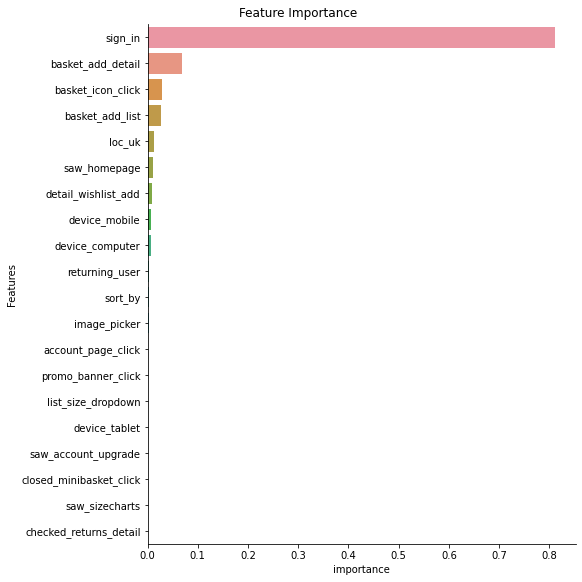

In [85]:
g = sns.catplot(data=feature_importances,x='importance',y='features',kind='bar',height=8, aspect=1,legend=False)
g.fig.subplots_adjust(top=0.95)
g.set_ylabels("Features")
g.fig.suptitle("Feature Importance")
g.fig.show()

#### SHAP Values

In [ ]:
# Shap values
#!pip install shap

In [58]:
import shap
# load JS visualization code to notebook
shap.initjs()
X_shap=shap.sample(X_train,100)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_shap)
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)

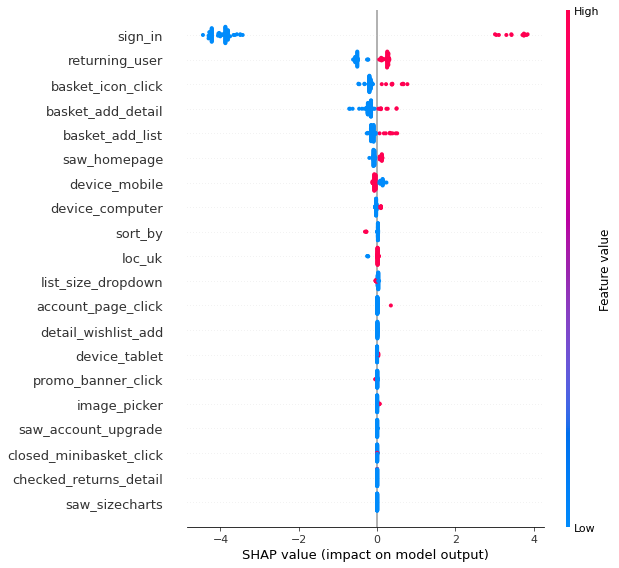

In [59]:
shap.summary_plot(shap_values, X_shap, plot_type='dot')

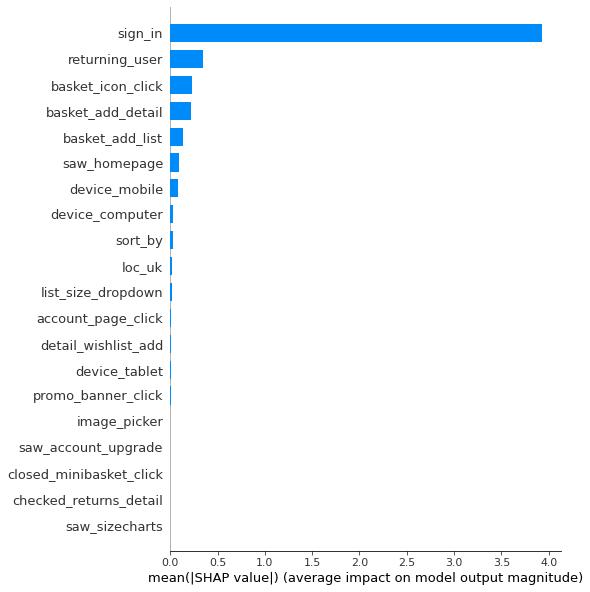

In [61]:
shap.summary_plot(shap_values, X_shap, plot_type="bar",max_display=100,plot_size=(7, 10))

## Prediction Test Dataset

In [86]:
# Predict X_test
y_pred = model.predict(X_test)
y_proba_pred = model.predict_proba(X_test)[:,1]

## Evaluation

#### Confusion Matrix

In [87]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[128483,   2410],
       [  1442,   4286]])

In [65]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
df_confmat = pd.DataFrame(confusion_matrix(y_test, y_pred))
df_confmat.index.name = 'True'
df_confmat.columns.name = 'Predicted'
df_confmat

Predicted,0,1
True,,
0,128483,2410
1,1442,4286


In [66]:
# Assess probability threshold
result = pd.DataFrame()
thresholds = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for threshold in thresholds:
  y_proba_pred_thres = [1. if y_cont > threshold  else 0. for y_cont in y_proba_pred]
  df_confmat = pd.DataFrame(confusion_matrix(y_test, y_proba_pred_thres))
  columns=[(threshold,0),(threshold,1)]
  df_confmat.columns = pd.MultiIndex.from_tuples(columns)
  df_confmat.columns.names = ['Threshold', 'Predicted']
  result = pd.concat([result.reset_index(drop=True),df_confmat.reset_index(drop=True)],axis='columns')

result.index.name = 'True'
result

Threshold     0.2           0.3           0.4           0.5           0.6           0.7          0.8    
Predicted       0     1       0     1       0     1       0     1       0     1       0    1       0   1
True                                                                                                    
0          126722  4171  126925  3968  127434  3459  128483  2410  129458  1435  130566  327  130862  31
1             257  5471     329  5399     588  5140    1442  4286    2709  3019    4790  938    5648  80

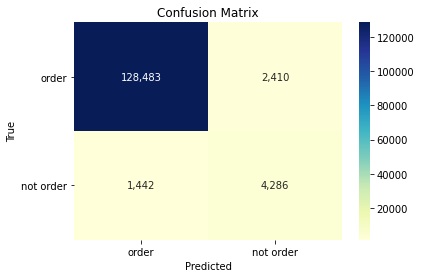

In [68]:
conf_mat= pd.DataFrame(confusion_matrix(y_test, y_pred))
fig = plt.figure(figsize=(6,4))
ax = sns.heatmap(conf_mat, annot=True, fmt=',g',cmap='YlGnBu',cbar_kws={"shrink": 1})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
ax.xaxis.set_ticklabels(['order','not order'])
ax.yaxis.set_ticklabels(['order','not order'],rotation=0)
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### ROC AUC Score

In [69]:
# ROC AUC Score
from sklearn.metrics import roc_auc_score
print ('AUC Score : %0.15f' %roc_auc_score(y_test,y_proba_pred))

AUC Score : 0.986568748987136


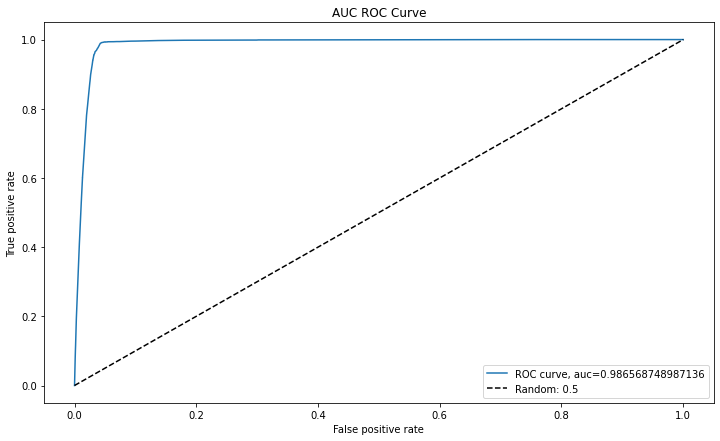

In [70]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_proba_pred)
auc = metrics.roc_auc_score(y_test, y_proba_pred)
plt.subplots(figsize=(12,7))
plt.plot(fpr,tpr,label="ROC curve, auc="+str(auc))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AUC ROC Curve')
plt.legend(loc=4)
plt.show()

#### Classification Report

In [71]:
# Classification Report
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()
df_class_report

,precision,recall,f1-score,support
0,0.988901,0.981588,0.985231,130893.000000
1,0.640084,0.748254,0.689955,5728.000000
accuracy,0.971805,0.971805,0.971805,0.971805
macro avg,0.814492,0.864921,0.837593,136621.000000
weighted avg,0.974277,0.971805,0.972851,136621.000000


In [72]:
from sklearn.metrics import precision_recall_fscore_support
prfs_score = precision_recall_fscore_support(y_test,y_pred,average='macro')
print("Precision  |  Recall  | F1 Score ")
print("%0.6f   | %0.6f | %0.6f  " % (prfs_score[0],prfs_score[1],prfs_score[2]))

Precision  |  Recall  | F1 Score 
0.814492   | 0.864921 | 0.837593  
